In [67]:
#let's first import everything we may need.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [68]:
#now let's import and have a look at our file.
data = pd.read_csv("titanic.csv")

In [69]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
#let's now start the preprocessing phase.
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [72]:
#the "cabin" column has a lot of missing data.
#we're going to drop this column since it's not important
data.drop('Cabin', inplace=True, axis=1)

In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [74]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [75]:
#the "age" column also has a lot of missing data but we can't drop it since it's important and cannot be treated.
#so we're going to fill in the missing data with the mean/average.
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [77]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [78]:
#our data is now much cleaner and we only have two rows with missing data so we're simply going to delete them.
data.dropna(axis=0, how='any', thresh=None, inplace=True)

In [79]:
data.isnull().sum().sum()
#we can now be sure that our data is clean and is ready to be treated.
#the preprocessing phase is over.

0

D:\Software\Mah Anaconda GOO\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

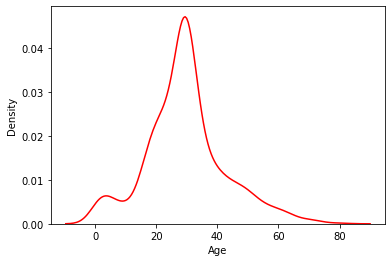

In [80]:
#let's now begin with the visualization phase.
#i think the most important features are age and sex. So let's study their distribution.
#we'll use a graph for age and a barplot for sex.
sns.distplot(data["Age"], bins=10, hist=False, kde=True, color="red")

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

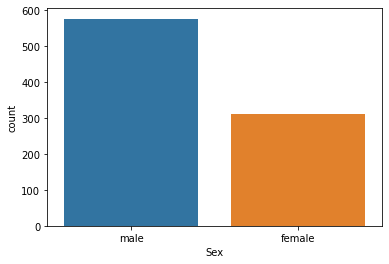

In [81]:
sns.countplot(x="Sex", data= data)
plt.xticks(rotation =0)

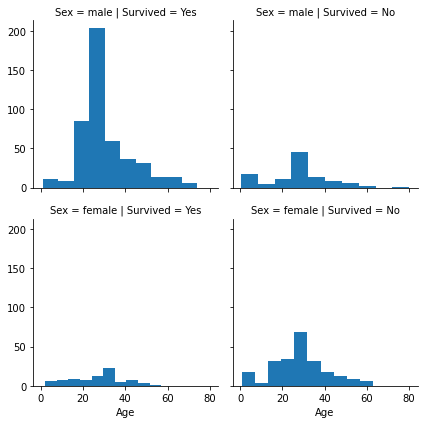

In [82]:
#let's now see the correlation between Sex and Age and their effect on the survival of the passengers.
data.Survived.replace([0, 1],["Yes", "No"] , inplace = True)
#I converted the 0s and 1s in survived to yes or no just for aesthetic purposes.
cor = sns.FacetGrid(data, col="Survived", row="Sex")
cor.map(plt.hist, "Age", bins = 10)


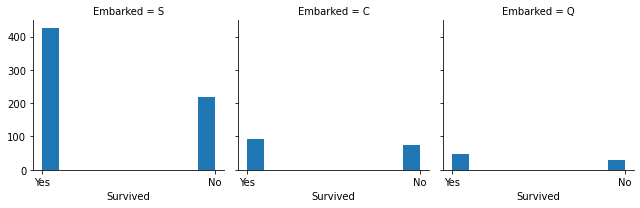

In [83]:
#we can deduce that much more males survived than females, especially at ages from 20 to 40
#let's now study the effect of Pclass and Embarked on the survival of the passengers

cor = sns.FacetGrid(data, col="Embarked")
cor.map(plt.hist, "Survived", bins = 10)
#we can see that in C and Q there's nothing to deduce.
#however in S much more people survived so we can deduce that people that embarked from Southampton have a survival advantage.

<AxesSubplot:>

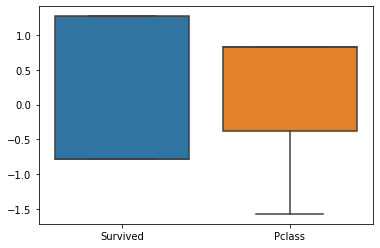

In [85]:
comparison_set = data.drop(["PassengerId", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Embarked"], axis = 1)
#let's now standardize the Survived and Pclass columns since they're on different scales.
data.Survived.replace(["Yes", "No"],[0,1], inplace = True)
scaler = StandardScaler()
comparison_set["Pclass"] = scaler.fit_transform(comparison_set[["Pclass"]].values)
comparison_set["Survived"] = scaler.fit_transform(comparison_set[["Survived"]].values)
#finally, we'll make a boxplot to compare Pclass and Survived.
sns.boxplot(data = comparison_set)
#I don't see anything to be concluded from this boxplot.
